In [18]:
# Import relevant libraries
import requests
import json
import hvplot.pandas
import pandas as pd
from scipy.stats import linregress
from matplotlib import pyplot as plt


from config import api_key

In [19]:
# Read in data from CSV to DataFrame
path = "./NY-House-Dataset.csv"
housing_df = pd.read_csv(path)
housing_df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [20]:
# Clean up data
def checknumeric(txt):
    return txt.isnumeric()

wrong_df = housing_df.loc[(housing_df["ADMINISTRATIVE_AREA_LEVEL_2"].apply(checknumeric)) | (housing_df["PRICE"] > 5000000)]
remove = wrong_df.index
housing_df = housing_df.drop(labels=remove)
housing_df = housing_df.drop(labels=["MAIN_ADDRESS","ADMINISTRATIVE_AREA_LEVEL_2","STREET_NAME","LONG_NAME", "FORMATTED_ADDRESS"], axis = 1)
housing_df.reset_index(inplace=True)
housing_df

,index,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
0,0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.0,1400.000000,2 E 55th St Unit 803,"New York, NY 10022",New York,Manhattan,40.761255,-73.974483
1,2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.000000,620 Sinclair Ave,"Staten Island, NY 10312",New York,Richmond County,40.541805,-74.196109
2,3,Brokered by COMPASS,Condo for sale,69000,3,1.0,445.000000,2 E 55th St Unit 908W33,"Manhattan, NY 10022",New York,New York County,40.761398,-73.974613
3,5,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.000000,584 Park Pl,"Brooklyn, NY 11238",New York,Kings County,40.674363,-73.958725
4,6,Brokered by Douglas Elliman - 575 Madison Ave,Condo for sale,899500,2,2.0,2184.207862,157 W 126th St Unit 1B,"New York, NY 10027",New York County,New York,40.809448,-73.946777
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4444,4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075",New York County,New York,40.774350,-73.955879
4445,4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374",New York,Queens County,40.732538,-73.860152
4446,4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011",New York,New York County,40.745882,-74.003398
4447,4799,Brokered by E Realty International Corp,Condo for sale,598125,2,1.0,655.000000,91-23 Corona Ave Unit 4G,"Elmhurst, NY 11373",Queens County,Queens,40.742770,-73.872752


In [ ]:
# General housing graphs

# Bar graphs of housing prices, rooms, etc.

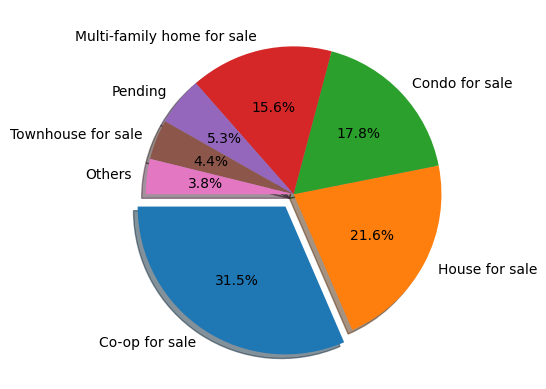

In [21]:
# Pie chart of house types
type_counts = housing_df["TYPE"].value_counts()
type_df = pd.DataFrame(type_counts).reset_index()
type_df

reduced_df = type_df[:6].copy()
others_df = pd.DataFrame({"TYPE": ["Others"], "count": [type_df["count"][6:].sum()]})

reduced_df = pd.concat([reduced_df, others_df])
reduced_df

explode = (0.1, 0, 0, 0, 0, 0, 0)

plt.pie(reduced_df["count"], labels=reduced_df["TYPE"], autopct='%1.1f%%', shadow=True, startangle=180, explode=explode)
plt.show()

In [ ]:
# Scatter plot comparing price to square footage

#include linear regression

In [22]:
coop_df = housing_df[housing_df["TYPE"] == "Co-op for sale"]
coop_df

,index,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,LOCALITY,SUBLOCALITY,LATITUDE,LONGITUDE
5,8,Brokered by Pantiga Group Inc.,Co-op for sale,265000,1,1.0,750.000000,875 Morrison Ave Apt 3M,"Bronx, NY 10473",The Bronx,East Bronx,40.821586,-73.874089
6,9,Brokered by CENTURY 21 MK Realty,Co-op for sale,440000,2,1.0,978.000000,1350 Ocean Pkwy Apt 5G,"Brooklyn, NY 11230",Kings County,Brooklyn,40.615738,-73.969694
7,10,Brokered by Engel & Volkers Americas,Co-op for sale,375000,2,1.0,850.000000,800 Grand Concourse Apt 2JS,"Bronx, NY 10451",Bronx County,The Bronx,40.824870,-73.922983
9,12,Brokered by COMPASS,Co-op for sale,259000,3,1.0,2184.207862,34-41 85th St Unit 1D,"Jackson Heights, NY 11372",Queens County,Queens,40.753119,-73.881876
10,13,Brokered by Jamie & Connie Real Estate Grp,Co-op for sale,430000,2,2.0,2184.207862,91-15 Lamont Ave Unit 6D,"Elmhurst, NY 11373",Queens County,Queens,40.743864,-73.874572
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4441,4793,Brokered by Engel & V�������,Co-op for sale,1950000,2,4.0,2184.207862,700 Park Ave Unit 20A,"New York, NY 10021",New York County,New York,40.769478,-73.965389
4444,4796,Brokered by COMPASS,Co-op for sale,599000,1,1.0,2184.207862,222 E 80th St Apt 3A,"Manhattan, NY 10075",New York County,New York,40.774350,-73.955879
4445,4797,Brokered by Mjr Real Estate Llc,Co-op for sale,245000,1,1.0,2184.207862,97-40 62 Dr Unit Lg,"Rego Park, NY 11374",New York,Queens County,40.732538,-73.860152
4446,4798,Brokered by Douglas Elliman - 575 Madison Ave,Co-op for sale,1275000,1,1.0,2184.207862,427 W 21st St Unit Garden,"New York, NY 10011",New York,New York County,40.745882,-74.003398


In [24]:
# Geoapify graphs 
mapped = coop_df.hvplot.points(x="LONGITUDE", 
                                  y="LATITUDE",
                                  geo=True,
                                  tiles="OSM",
                                  width=700,
                                  height=500,
                                  color="LOCALITY"
                                  )
# Map of co-ops(?)
mapped

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [LONGITUDE,LATITUDE]   (LOCALITY)

In [ ]:
#Map of houses

In [ ]:
#Map of nearby services (color code?)

In [ ]:
# Scatter(s) of distance to service vs price

# Include linear regression

In [ ]:
# Analysis Text

In [ ]:
# References